In [34]:
!pip3 install pandas


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
!pip3 install numpy


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
!pip3 install textblob


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
!pip3 install matplotlib
!pip3 install nltk
!pip3 install wordcloud


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

In [48]:
reviews=pd.read_csv('extract_reviews.csv')
reviews.head()

,stars,comment
0,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n The quality of the...
1,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n My 1 year old love...
2,4.0 out of 5 stars,NaN
3,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n This is the best g...
4,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Perfect for your l...


In [49]:
# Load stop words, positive words, and negative words from text files
stop_words = None
with open('stop.txt', 'r') as file:
    stop_words = file.read().splitlines()
print(stop_words)

['a', "a's", 'able', 'about', 'above', 'according', 'accordingly', 'across', 'actually', 'after', 'afterwards', 'again', 'against', "ain't", 'all', 'allow', 'allows', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'an', 'and', 'another', 'any', 'anybody', 'anyhow', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'apart', 'appear', 'appreciate', 'appropriate', 'are', "aren't", 'around', 'as', 'aside', 'ask', 'asking', 'associated', 'at', 'available', 'away', 'awfully', 'b', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'believe', 'below', 'beside', 'besides', 'best', 'better', 'between', 'beyond', 'both', 'brief', 'but', 'by', 'c', "c'mon", "c's", 'came', 'can', "can't", 'cannot', 'cant', 'cause', 'causes', 'certain', 'certainly', 'changes', 'clearly', 'co', 'com', 'come', 'comes', 'concerning', 'consequently', 'consider', 'considering', 'contain', 'containing', 'conta

In [50]:
positive_words = None
with open('positive-words.txt', 'r') as file:
    positive_words = file.read().splitlines()
print(positive_words)

['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation', 'accolade', 'accolades', 'accommodative', 'accomodative', 'accomplish', 'accomplished', 'accomplishment', 'accomplishments', 'accurate', 'accurately', 'achievable', 'achievement', 'achievements', 'achievible', 'acumen', 'adaptable', 'adaptive', 'adequate', 'adjustable', 'admirable', 'admirably', 'admiration', 'admire', 'admirer', 'admiring', 'admiringly', 'adorable', 'adore', 'adored', 'adorer', 'adoring', 'adoringly', 'adroit', 'adroitly', 'adulate', 'adulation', 'adulatory', 'advanced', 'advantage', 'advantageous', 'advantageously', 'advantages', 'adventuresome', 'adventurous', 'advocate', 'advocated', 'advocates', 'affability', 'affable', 'affably', 'affectation', 'affection', 'affectionate', 'affinity', 'affirm', 'affirmation', 'affirmative', 'affluence', 'affluent', 'afford', 'affordable', 'affordably', 'afordable', 'agile', 'agilely', 'agility', 'agreeable', 'ag

In [51]:
negative_words = None
with open('negative-words.txt', 'r') as file:
    negative_words = file.read().splitlines()
print(negative_words)

['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'aborted', 'aborts', 'abrade', 'abrasive', 'abrupt', 'abruptly', 'abscond', 'absence', 'absent-minded', 'absentee', 'absurd', 'absurdity', 'absurdly', 'absurdness', 'abuse', 'abused', 'abuses', 'abusive', 'abysmal', 'abysmally', 'abyss', 'accidental', 'accost', 'accursed', 'accusation', 'accusations', 'accuse', 'accuses', 'accusing', 'accusingly', 'acerbate', 'acerbic', 'acerbically', 'ache', 'ached', 'aches', 'achey', 'aching', 'acrid', 'acridly', 'acridness', 'acrimonious', 'acrimoniously', 'acrimony', 'adamant', 'adamantly', 'addict', 'addicted', 'addicting', 'addicts', 'admonish', 'admonisher', 'admonishingly', 'admonishment', 'admonition', 'adulterate', 'adulterated', 'adulteration', 'adulterier', 'adversarial', 'adversary', 'adverse', 'adversity', 'afflict', 'affliction', 'afflictive', 'affront', 'afraid', 'aggravate', 'aggravating', 'aggravation', 'aggression', 'aggress

In [52]:
import nltk
nltk.download('punkt')
# Tokenize and remove stop words from comments
def remove_stopwords(comment):
    tokens = word_tokenize(comment.lower())  # Tokenize text and convert to lowercase
    return [word for word in tokens if word.isalpha() and word not in stop_words]  # Remove stop words and non-alphabetic words

reviews['tokenized_comment'] = reviews['comment'].fillna('').apply(remove_stopwords)



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [53]:
# Emotion mining: Count positive and negative words in tokenized comments
def emotion_mining(tokenized_comment):
    pos_count = sum(word in positive_words for word in tokenized_comment)
    neg_count = sum(word in negative_words for word in tokenized_comment)
    if pos_count > neg_count:
        return 'Positive'
    elif pos_count < neg_count:
        return 'Negative'
    else:
        return 'Neutral'

reviews['emotion'] = reviews['tokenized_comment'].apply(emotion_mining)

# Display the DataFrame with tokenized comments and emotion mining results
print(reviews[['stars', 'comment', 'tokenized_comment', 'emotion']])

                 stars                                            comment  \
0   5.0 out of 5 stars  \n\n\n\n\n\n\n\n  \n  \n    The quality of the...   
1   5.0 out of 5 stars  \n\n\n\n\n\n\n\n  \n  \n    My 1 year old love...   
2   4.0 out of 5 stars                                                NaN   
3   5.0 out of 5 stars  \n\n\n\n\n\n\n\n  \n  \n    This is the best g...   
4   5.0 out of 5 stars  \n\n\n\n\n\n\n\n  \n  \n    Perfect for your l...   
5   5.0 out of 5 stars  \n\n\n\n\n\n\n\n  \n  \n    The product is ver...   
6   4.0 out of 5 stars  \n\n\n\n\n\n\n\n  \n  \n    Very useful and qu...   
7   5.0 out of 5 stars  \n\n\n\n\n\n\n\n  \n  \n    Good product,nyc q...   
8   4.0 out of 5 stars  \n\n\n\n\n\n\n\n  \n  \n    Ok with on time de...   
9   4.0 out of 5 stars                                                NaN   
10               stars                                            comment   
11  5.0 out of 5 stars  \n\n\n\n\n\n\n\n  \n  \n    The quality of the...   

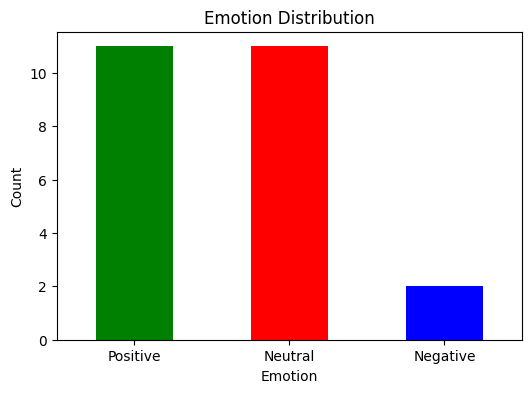

In [54]:
import matplotlib.pyplot as plt

# Calculate value counts of emotions
emotion_counts = reviews['emotion'].value_counts()

# Plotting emotion distribution
plt.figure(figsize=(6, 4))
emotion_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Emotion Distribution')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


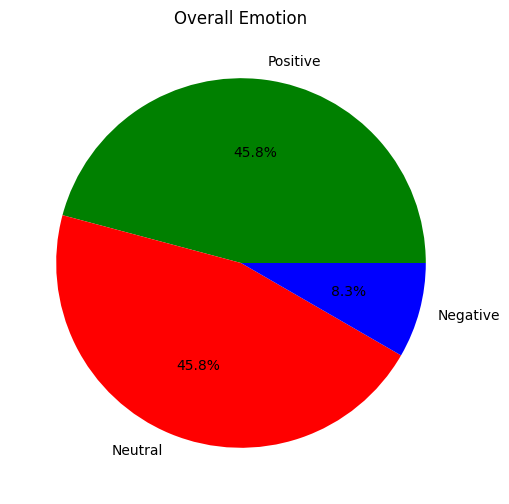

In [55]:
# Calculate emotion label proportions
emotion_proportions = emotion_counts / emotion_counts.sum()

# Plotting pie chart for overall emotion
plt.figure(figsize=(6, 6))
plt.pie(emotion_proportions, labels=emotion_proportions.index, autopct='%1.1f%%', colors=['green', 'red', 'blue'])
plt.title('Overall Emotion')
plt.show()


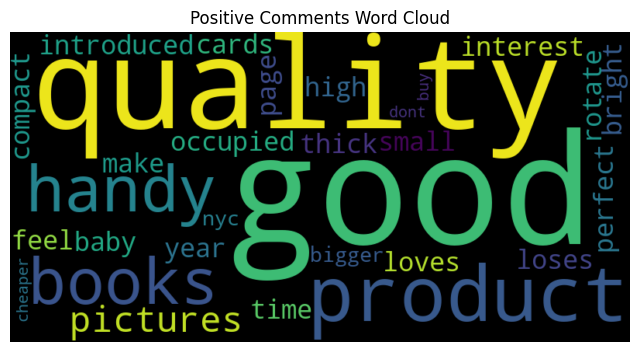

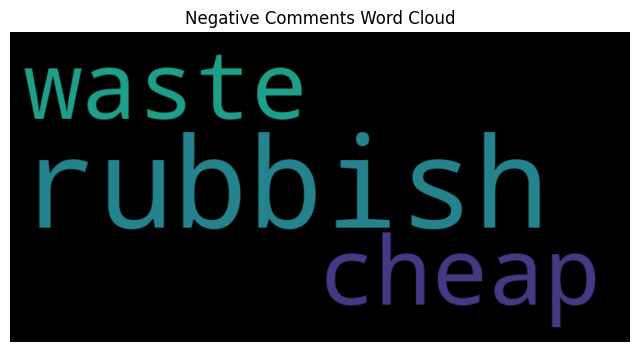

In [56]:
from wordcloud import WordCloud

# Filter positive and negative comments
positive_comments = ' '.join(reviews[reviews['emotion'] == 'Positive']['tokenized_comment'].explode().dropna())
negative_comments = ' '.join(reviews[reviews['emotion'] == 'Negative']['tokenized_comment'].explode().dropna())

# Check if there are comments for each sentiment
if len(positive_comments) > 0:
    # Generate word cloud for positive comments
    positive_wordcloud = WordCloud(width=800, height=400).generate(positive_comments)

    # Plotting word cloud for positive comments
    plt.figure(figsize=(8, 6))
    plt.imshow(positive_wordcloud, interpolation='bilinear')
    plt.title('Positive Comments Word Cloud')
    plt.axis('off')
    plt.show()
else:
    print("No positive comments found.")

if len(negative_comments) > 0:
    # Generate word cloud for negative comments
    negative_wordcloud = WordCloud(width=800, height=400).generate(negative_comments)

    # Plotting word cloud for negative comments
    plt.figure(figsize=(8, 6))
    plt.imshow(negative_wordcloud, interpolation='bilinear')
    plt.title('Negative Comments Word Cloud')
    plt.axis('off')
    plt.show()
else:
    print("No negative comments found.")
